In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from astropy.io import fits
import numpy as np
fits_file = 'res.bw088a.fin.q.tdcal.M87.i.fits'
hdul = fits.open(fits_file)

print(hdul[0])
print(hdul[1])

print(hdul.info()) #어떤 프레임에 어떤 데이터가 들어가있는지 확인

image_data = hdul[0].data
image_header = hdul[0].header

hdul.close()
print(image_data)

Filename: res.bw088a.fin.q.tdcal.M87.i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1900   (1024, 1024, 1, 1)   float32   
  1  AIPS CC       1 BinTableHDU     32   3331R x 7C   [1E, 1E, 1E, 1E, 1E, 1E, 1E]   
None
[[[[ 1.18856347e-04  1.23219739e-04  8.96632846e-05 ... -2.63611801e-05
    -7.87044628e-05 -1.07994056e-04]
   [ 1.12740978e-04  1.12337468e-04  8.26461110e-05 ... -3.16315491e-05
    -7.60854964e-05 -1.12181981e-04]
   [ 1.11432797e-04  1.13801994e-04  8.90659139e-05 ... -3.54167460e-05
    -7.65417644e-05 -1.10340181e-04]
   ...
   [ 2.36192005e-04  2.42463051e-04  2.36740452e-04 ...  2.94637193e-05
     6.69891015e-05  1.21091703e-04]
   [ 2.08464277e-04  2.09714359e-04  1.99581496e-04 ...  7.07925137e-05
     1.12484639e-04  1.71506908e-04]
   [ 1.83599463e-04  1.81845040e-04  1.67513674e-04 ...  1.04496721e-04
     1.53105459e-04  2.19839480e-04]]]]


-0.0005714321305276826


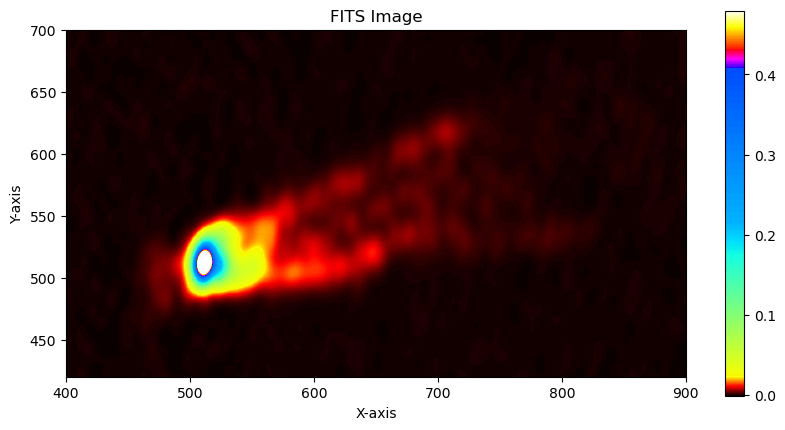

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap


# colormap 만들기!
colors = ["black", "red", "yellow", 'green',"skyblue", "purple", "red", "red", "red", "yellow", "white"]
n_bins = 1000
cmap_name = 'custom_colormap'

cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
# 'jet' colormap 가져오기
jet = plt.get_cmap('jet')
jet_color =jet(np.linspace(0, 1, 256))
jet_colors1 = jet(np.linspace(0.3, 0.65, 512))
jet_colors2 = jet(np.linspace(0.2, 0.3,512))
reversed_jet = jet_colors1[::-1]
reversed_jet2 = jet_colors2[::-1]

hsv= plt.get_cmap('hsv')
hsv_colors = hsv(np.linspace(0.7, 1, 64))


hot = plt.get_cmap('hot')
hot_colors = hot(np.linspace(0.4, 1,128))
hot_colors1 = hot(np.linspace(0, 0.75, 64))
hot_colors3 = hot(np.linspace(0.4, 0.6,512))


combined_colors = np.vstack((hot_colors1, reversed_jet,reversed_jet2,hsv_colors,hot_colors))

# 결합된 colormap 생성
combined_cmap = ListedColormap(combined_colors)#, name='black_jet')



##블랙홀 plot
plt.figure(figsize=(10,10))
max_value=np.percentile(image_data,99.985)
min_value=np.percentile(image_data,0.1)
print(min_value)
plt.imshow(image_data[0,0,:,:],cmap=combined_cmap,vmax=max_value,vmin=min_value)
plt.colorbar(shrink=0.5)
 
plt.title('FITS Image')
plt.xlim(400,900)
plt.ylim(420,700)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

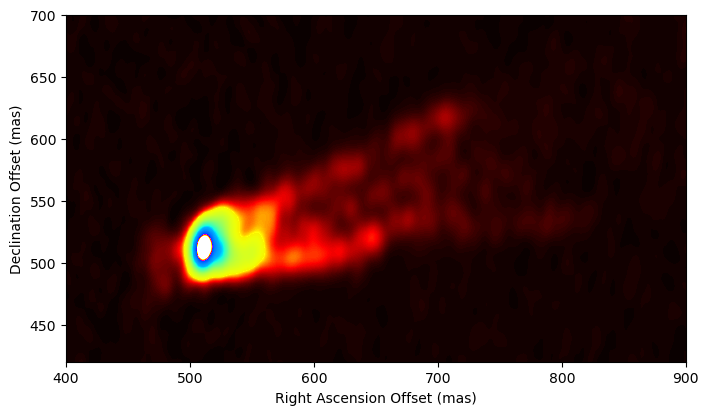

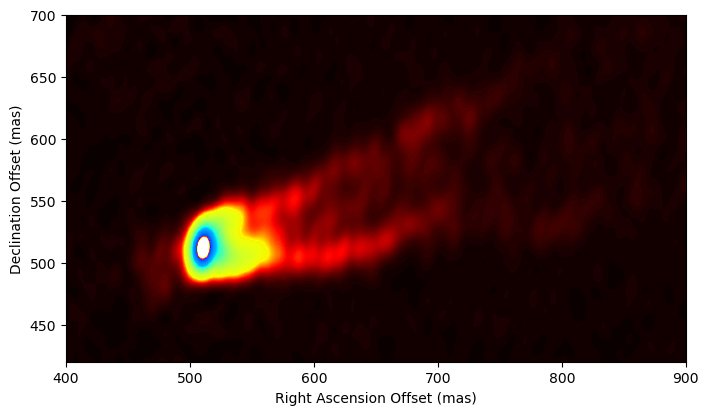

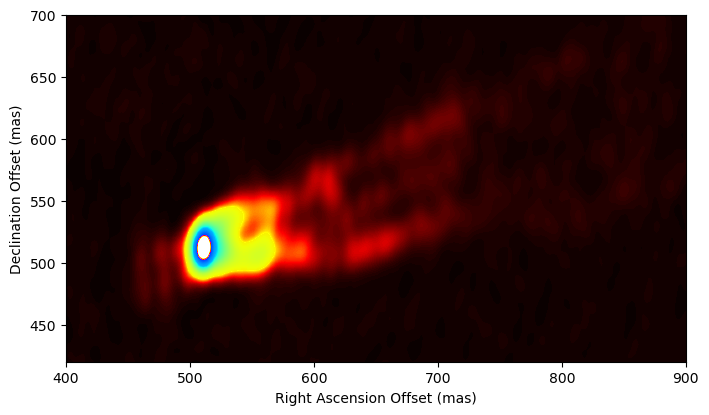

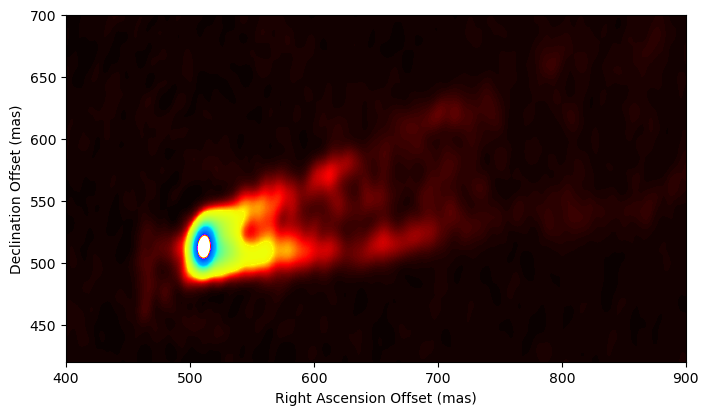

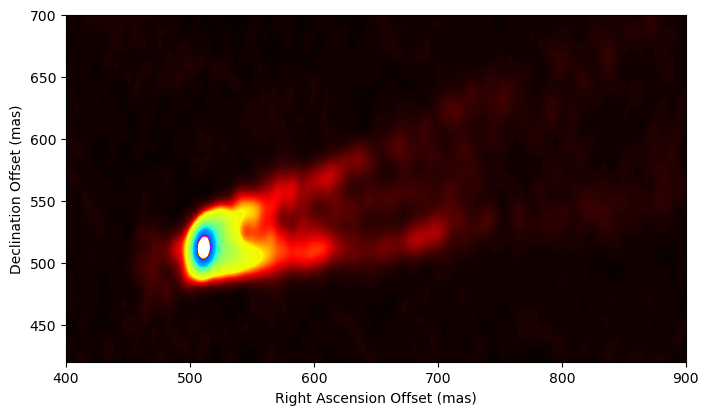

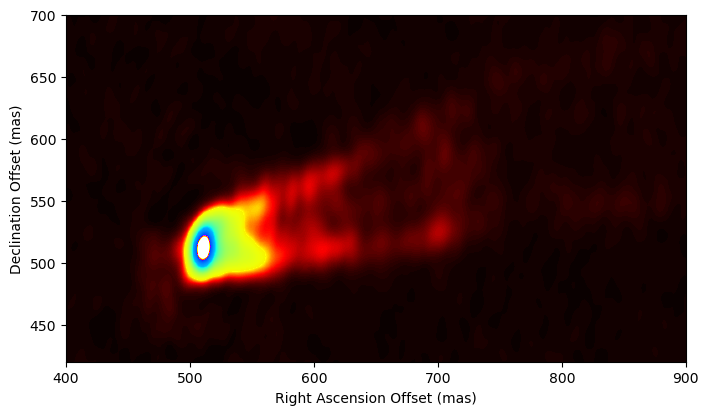

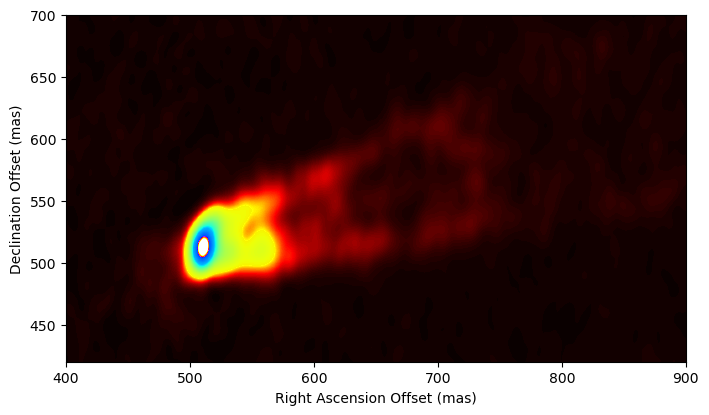

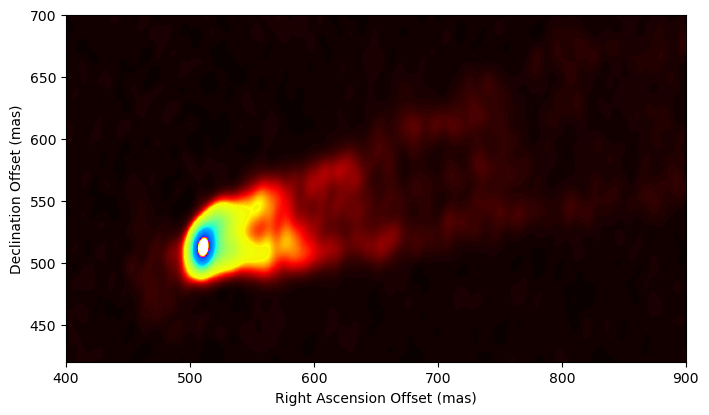

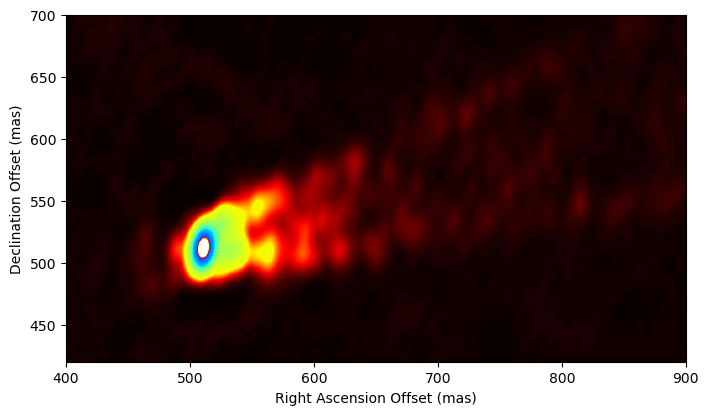

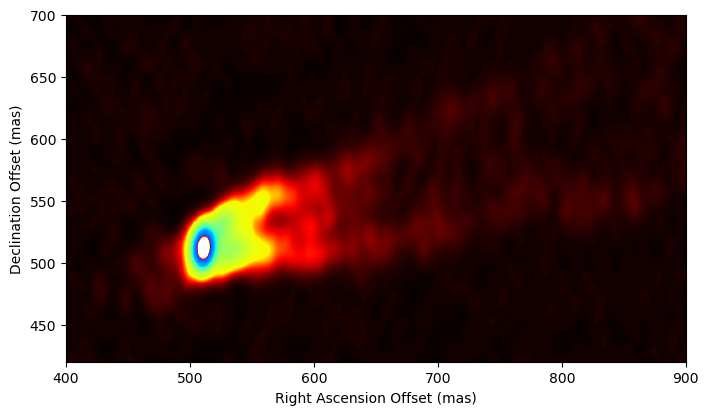

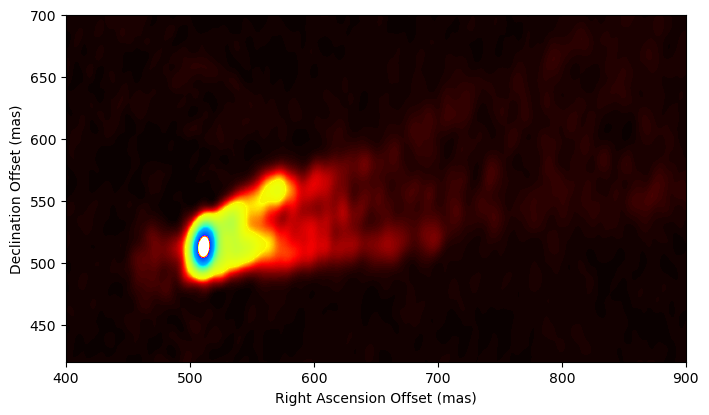

In [7]:
M87=['a','b','d','e','f','g','h','i','j','k','l']

fits_file_front = 'res.bw088'
fits_file_back = '.fin.q.tdcal.M87.i.fits'


# fits 파일 읽기
for i in M87:
    hdul = fits.open(fits_file_front+i+fits_file_back)
    image_data = hdul[0].data
    image_header = hdul[0].header
    hdul.close()
    
    plt.figure(figsize=(8, 8))
    
    
    plt.imshow(image_data[0,0,:,:],cmap=combined_cmap,vmax=max_value,vmin=min_value)
  #  plt.colorbar(shrink=0.5)
#    plt.title('FITS Image, '+i)
    plt.xlim(400,900)
    plt.ylim(420,700)
    plt.xlabel('Right Ascension Offset (mas)')
    plt.ylabel('Declination Offset (mas)')
    plt.savefig('FITS Image, '+i+'.png')
    plt.show()